# Logistic Regression Algoritması

# İkili Sınıflandırma
## $h_\theta(x) \in \{0,1\}$
## $h_\theta(x) = g(\theta^TX) = {1 \over 1+e^{-\theta^TX}}$
## $g(Z) = {1 \over 1+e^{-Z}} \rightarrow$   Sigmoid ya da Logistic fonksiyon

## $\Rightarrow \ \theta_J := \ \theta_J + \alpha \sum \limits _{i=1}^m (y^i-h_\theta(x^i))x_J^i $

## $\theta_J = [\theta_1 , \theta_2 , \theta_3 , ... , \theta_{n+1}] $
## $\theta=Ağırlık \ Değerleri$ 
## $m = Örnek \ sayısı$ 
## $n = Özellik \ sayısı$ 
## $i = i \ inci \ örnek$ 
## $j = j \ inci \ özellik$
## $\alpha = Öğrenme \ oranı$

# Heart Attack Veri Seti Sınıflandırma

In [1]:
#kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
#veri setinin yüklenmesi
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Veri Seti Hakkında Bilgiler
* age: Hastanın yaşı
* sex: Hastaın cinsiyeti
* cp: Göğüs ağrı tipi
    * 1: Tipik angina
    * 2: Tipik olmayan angina
    * 3: Angina olmayan ağrı
    * 4: Asemptomatik
* trtbps: Kan basıncı (mm Hg)
* chol: Kolesterol(mg/dl)
* fbs: (Kan şekeri > 120 mg/dl) (1 = true; 0 = false)
* restecg: Elektrokardiyografik sonuçları
    * 0: Normal
    * 1: ST-T dalgası anormalliği
    * 2: Olası veya kesin sol ventrikül hipertrofisi
* thalachh: Ulaşılan maksimum kalp atış hızı
* output: 0:Kalp krizi riski az, 1:Klap krizi riski fazla

### Veri Seti Tanımlama

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Veri Türleri Hakkında Bilgiler

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Veri Önişleme
### Eksik Veri Kontrolü

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Toplam Örnek Sayısı ve Output Dağılımı

In [7]:
print("Toplam: " , data.shape[0])
print("Ouptput Dağılımı\n{0}".format(data.output.value_counts()))

Toplam:  303
Ouptput Dağılımı
1    165
0    138
Name: output, dtype: int64


In [8]:
x = data.iloc[:,:-1].copy()
y = data.iloc[:,-1].copy()

In [9]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

### Veri Setinin Parçalanması

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=0 , test_size=0.33)

In [12]:
x_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3


In [13]:
y_train.head()

252    0
54     1
234    0
18     1
205    0
Name: output, dtype: int64

In [14]:
print("x_train shape: {0}\nx_test shape: {1}".format(x_train.shape,x_test.shape))

x_train shape: (203, 13)
x_test shape: (100, 13)


### Normalizasyon

In [15]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [16]:
x_train[0,:]

array([ 0.85703278, -1.30639453, -0.92170256,  0.42401952,  0.82851175,
        2.35550145,  0.83715553, -2.00163972, -0.71758301,  0.66036428,
       -0.67082039,  2.27450255, -0.44452637])

In [17]:
y_train = y_train.values
y_test = y_test.values

## Logistic Regression Algoritmasının Kullanılması

In [18]:
from LogR_Class import LogisticRegression

In [19]:
lgr = LogisticRegression()
lgr.train(x_train , y_train)

In [20]:
predict = lgr.predict(x_test)
predict[:5]

array([[0.02222441],
       [0.7935896 ],
       [0.77464183],
       [0.01052719],
       [0.07870238]])

In [21]:
predict[predict >=0.5] = 1
predict[predict < 0.5] = 0
predict[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.]])

### Doğruluk Oranı

In [22]:
com = confusion_matrix(y_test , predict)
rate = com.diagonal().sum() / com.sum()
print("Confusion Matrix:\n{0}".format(com))
print("Doğruluk Oranı: %{0}".format(rate * 100))

Confusion Matrix:
[[37 11]
 [ 7 45]]
Doğruluk Oranı: %82.0


## Diğer Makine Öğrenmesi Algoritmalarının Kullanılması

In [23]:
#Algoritmaların Yüklenmesi
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
from sklearn.naive_bayes import GaussianNB , BernoulliNB
gnb = GaussianNB()
bnb = BernoulliNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [24]:
def model_fun(models , names , x_train , y_train , x_test , y_test):
    train_scores = {}
    com = {}
    scores = {}
    
    for i in range(len(models)):
        name = names[i]
        model = models[i]
        
        model.fit(x_train , y_train)
        pred = model.predict(x_test)
        
        _com = confusion_matrix(y_test , pred)
        com[name] = _com
        train_scores[name] = model.score(x_train , y_train)
        scores[name] = _com.diagonal().sum() / _com.sum()
    
    plt.title("Train Skorları")
    sns.barplot(x = list(train_scores.values()) , y = list(train_scores.keys()) , palette = "inferno")
    plt.xlim(min(train_scores.values())-0.05,max(train_scores.values())+0.005)
    plt.show()

    plt.title("Skorlar")
    sns.barplot(x = list(scores.values()) , y = list(scores.keys()) , palette = "inferno")
    plt.xlim(min(scores.values())-0.05,max(scores.values())+0.005)
    plt.show()

    for j in names:
        print(j)
        print(com[j])
        print(scores[j])

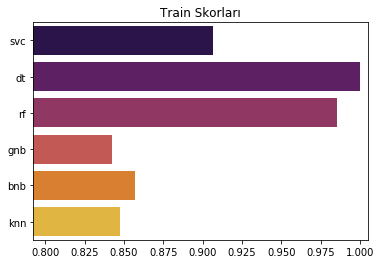

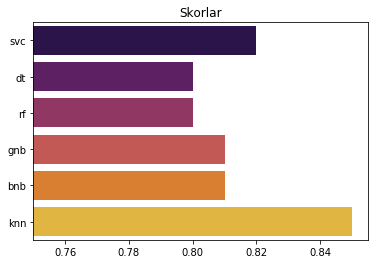

svc
[[35 13]
 [ 5 47]]
0.82
dt
[[41  7]
 [13 39]]
0.8
rf
[[40  8]
 [12 40]]
0.8
gnb
[[36 12]
 [ 7 45]]
0.81
bnb
[[38 10]
 [ 9 43]]
0.81
knn
[[38 10]
 [ 5 47]]
0.85


In [25]:
model_fun(
    [svc , dt , rf , gnb , bnb , knn],
    ["svc" , "dt" , "rf" , "gnb" , "bnb" , "knn"],
    x_train , y_train , x_test , y_test
)

### En İyi Parametrelerin Bulunması

In [26]:
def the_best(models , parameters , names , x_train , y_train):
    best_scores = {}
    best_parameters = {}
    
    for i in range(len(models)):
        _model = models[i]
        _param = parameters[i]
        _name = names[i]
        gs = GridSearchCV(estimator = _model,
                  param_grid = _param,
                  scoring="accuracy",
                  cv=5,
                  iid=False
                  )
        grid_search = gs.fit(x_train , y_train)
        best_scores[_name] = grid_search.best_score_
        best_parameters[_name] = grid_search.best_params_
        
    for j in best_parameters.keys():
        print("{0}\n{1}\n{2}\n".format(j , best_scores[j] , best_parameters[j]))

In [27]:
p_svc = [{"kernel" : ["poly", "rbf"] , "gamma" : ["auto" , "scale"] 
          , "decision_function_shape" : ["ovo" , "ovr"]}]
p_knn = [{"n_neighbors" : [1,3,5] , "p" : [2,3,4]}]

In [28]:
the_best(
    [svc , knn],
    [p_svc , p_knn],
    ["svc" , "knn"],
    x_train,
    y_train
)

svc
0.8126829268292683
{'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

knn
0.8032926829268291
{'n_neighbors': 5, 'p': 2}



In [29]:
svc = SVC(decision_function_shape="ovo", gamma="auto", kernel="rbf")
knn = KNeighborsClassifier(n_neighbors= 5, p= 2)

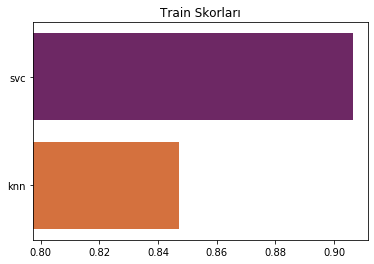

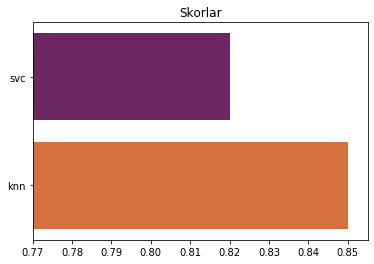

svc
[[35 13]
 [ 5 47]]
0.82
knn
[[38 10]
 [ 5 47]]
0.85


In [30]:
model_fun(
    [svc , knn],
    ["svc", "knn"],
    x_train , y_train , x_test , y_test
)

# Sınıf sayısı ikiden daha fazla olan veri setleri için sınıflandırma

In [31]:
from sklearn.datasets import load_iris
data = load_iris()
data.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [32]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [34]:
x = data.data
y = data.target

In [35]:
y = pd.get_dummies(y)
y.sample(5)

,0,1,2
92,0,1,0
80,0,1,0
131,0,0,1
149,0,0,1
137,0,0,1


In [36]:
y = y.values

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=0 , test_size=0.33)

In [38]:
y_train[:5]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [39]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [40]:
x_train[:5]

array([[-0.31699245, -1.33490866,  0.07470002, -0.13206311],
       [ 2.06897222, -0.15774053,  1.2920336 ,  1.40653626],
       [ 0.47832911,  0.54856035,  0.51736677,  0.50901996],
       [-0.43060981, -1.57034229,  0.01936667, -0.13206311],
       [ 0.47832911, -0.86404141,  0.62803346,  0.76545319]])

In [41]:
lgr = LogisticRegression(model_type = "MBGA")
lgr.train(x_train , y_train)

In [42]:
predict = lgr.predict(x_test)

In [43]:
argmax_pred = predict.argmax(axis=1)
argmax_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [44]:
argmax_y_test = y_test.argmax(axis = 1)
argmax_y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2], dtype=int64)

In [45]:
com = confusion_matrix(argmax_y_test , argmax_pred)
com

array([[16,  0,  0],
       [ 0, 14,  5],
       [ 0,  2, 13]], dtype=int64)

In [46]:
print("%{0}".format((com.diagonal().sum() / com.sum())*100))

%86.0
